In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'daily-temperature-of-major-cities:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F694560%2F1215964%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240919%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240919T202941Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db1de0bcad86cc40404becd4ca5084e30b2b03235b1a57fc2377b7a51b23a79fe56d85cf398da93dcea6fdcdcb7e8134129078cd6952272904755b1485bcc769f8e4dbd9de9f03e3c786c7b649edf2c47e9747008e24ccd09c15dfabf7e2d02b12d524dc2370d164a2444a1b27fe75ecabd8b500138d246c7511dd9550e74e330c3e29ba696f9c639427c6c76b8821b9f1e93b0018c59d3cd7887bee847c1587653d45c2da614f9829f5910b59938a4eaf3f69544638aa5ee8edda3b5d4d945834f144e0f990cc414f2b88d009b908c040687b6bc04379813d47e858abda215029aee2db89e87e6e0093d4e66cfa732db424cb045143bddd9d4d5cc67d0f2aa2d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Bazı temel kütüphanelerin import edilmesi ve Veriye Genel bir bakış

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter (action = 'ignore')

NumPy: Bilimsel bilgi işlem için temel kütüphanedir ve veri analizi, bilimsel araştırmalarda yaygın olarak kullanılır.

Pandas: Farklı formatlardaki verileri okumak, yazmak ve bu verileri kolay analizi için kullanılan bir kitaplıktır.

Seaborn: MatPlotLib kütüphanesini temel alan bir Python görselleştirme kütüphanesidir.

In [ ]:
df=pd.read_csv("/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv")

In [ ]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [ ]:
df.shape

(2906327, 8)

decribe() methodu gösteriyorki , 8 tane özellik ve 2906327 farklı örneğimiz bulunmakta

In [ ]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9




---
# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)
---





In [ ]:
df.duplicated().sum()# benzersiz satir sayisini bulur

20715

Bu method ile tekrarlanan verilerimiz olduğunu fark ettik. Bunu düzeltmek için 'drop_duplicates()' methodunu kullanıyor ve yeniden değeri test ediyoruz.

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Şuanki durumda benzersiz satir sayımız 0'a inmiş bulunmakta.

In [ ]:
df.isna().sum()

Region                  0
Country                 0
State             1448805
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

Şimdi de 'isna().sum()' methoduyla 'NAN: Not a Number' sayısını bulduk. State sütununda bazı NaN değerler bulduk fakat şimdilik bu sorunu 'Not Specified' diyerek çözebiliriz. Direkt veriyi silsek onla birlikte başka şeyler de silinip bize sıkıntı oluşturabilirdi.

In [ ]:
df=df.fillna("Not Specified")

In [ ]:
df.isna().sum()

Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

Sorunumuzu ilgili hücrelere string değer vererek çözdük.

In [ ]:
df.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [ ]:
df["Year"].value_counts()

Year
2000    118950
1999    118625
2001    118625
2002    118625
2003    118410
1998    118352
1996    118218
1997    117926
2004    117913
1995    117886
2005    117165
2006    116917
2007    114685
2010    114533
2008    113831
2009    113517
2011    112313
2012    111261
2013    110291
2014    108288
2015    106768
2016    106505
2017    106216
2018    105660
2019    105295
2020     38542
201        235
200         60
Name: count, dtype: int64

'Year' adlı sütünda 200 ve 201 yazan hücreler hatalı olmuş.

In [ ]:
df["Day"].value_counts()

Day
3     94988
4     94988
5     94987
6     94986
7     94986
8     94986
9     94984
10    94983
11    94981
2     94978
12    94976
1     94970
13    94949
15    94693
14    94691
18    94688
17    94688
16    94688
19    94687
21    94687
22    94686
20    94685
26    94681
23    94679
24    94679
25    94679
27    94677
28    94676
29    88743
30    86727
31    55128
0         8
Name: count, dtype: int64

Ayrıca 'Day' adlı sütunda da hatalı veriler bulunmakta. Bunları düzeltmeliyiz.
Bunun için o kısımları çıkarmamız gerekmekte.

In [ ]:
df =df[ (df['Year'] != 200) & (df['Year'] != 201) & (df['Day'] != 0) ]

Bu sorunu çözdük.
Şimdi ise daha iyi verileri anlamak için Fahrenheit olan değerleri Celcius'a çeviriyoruz.

In [ ]:
df["AvgTemperature"]=(df["AvgTemperature"]-32)*(5/9)

Daha sonrasında kullanmak için grafiklerde bir 'Date' sütunu oluşturdum

In [ ]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

-50'dereceden küçük ve 2020'ye eşit veya büyük olan değerleri verimizden çıkarıyoruz, çünkü içerisinde bazı istenmeyen droplar var.

In [ ]:
df =df[(df['AvgTemperature'] >= -50) & (df['Year'] < 2020)]

Son kez sütün sayılarımıza bakıyoruz eksik veya bozuk bir şey var mı diye.

In [ ]:
df["Year"].value_counts()

Year
2001    114547
2005    114045
2004    113865
2003    113557
2006    113471
2000    113437
2002    112896
1999    112678
2010    112631
2007    112452
2009    112249
1997    112222
1996    112002
2008    111651
1995    111422
2011    111129
2012    110433
1998    110380
2013    109498
2014    107130
2015    106079
2017    105691
2016    105671
2018    104712
2019    104047
Name: count, dtype: int64

In [ ]:
df["Month"].value_counts()

Month
3     235619
7     235456
1     235360
10    235095
8     234943
5     234889
12    233533
4     227675
9     227214
11    226871
6     226488
2     214752
Name: count, dtype: int64

In [ ]:
df["Day"].value_counts()

Day
8     91173
22    91172
27    91169
26    91126
3     91106
2     91101
12    91081
15    91079
13    91065
14    91065
11    91043
5     91041
6     91036
7     91034
4     91023
23    91018
16    90993
9     90897
17    90896
28    90889
1     90882
20    90872
25    90815
10    90774
21    90721
19    90703
18    90570
24    90395
29    85327
30    83134
31    52695
Name: count, dtype: int64

In [ ]:
df["City"].value_counts()

City
Portland       18225
Charleston     18222
Columbus       18204
Springfield    18196
Fairbanks       9119
               ...  
Lilongwe        2641
Frankfurt       2331
Georgetown      2136
Bonn            1083
Bujumbura        884
Name: count, Length: 321, dtype: int64

In [ ]:
df["State"].value_counts()

State
Not Specified             1356068
Texas                      127544
Ohio                        63808
Florida                     60320
Pennsylvania                51267
California                  45561
New York                    45557
Michigan                    45421
Tennessee                   36451
Alabama                     36449
North Carolina              36437
Indiana                     36426
Georgia                     36414
Colorado                    36406
Illinois                    36400
Oregon                      36399
Louisiana                   33086
Alaska                      27354
Washington                  27347
Missouri                    27343
Virginia                    27333
Kansas                      27331
Kentucky                    27322
Nebraska                    27306
Wisconsin                   27293
Montana                     27275
Arizona                     25853
Nevada                      18232
Wyoming                     18230
Mississi

In [ ]:
df["Country"].value_counts()

Country
US                   1411827
Canada                 73698
China                  45470
Australia              45332
India                  36368
                      ...   
Serbia-Montenegro       3247
Sierra Leone            3064
Malawi                  2641
Guyana                  2136
Burundi                  884
Name: count, Length: 125, dtype: int64

In [ ]:
df["Region"].value_counts()

Region
North America                        1508776
Europe                                361973
Asia                                  301754
Africa                                217714
South/Central America & Carribean     204063
Middle East                           119210
Australia/South Pacific                54405
Name: count, dtype: int64

In [ ]:
df["AvgTemperature"].value_counts()


AvgTemperature
 26.777778    7343
 27.111111    7292
 26.222222    7162
 27.277778    7134
 26.944444    7125
              ... 
-38.277778       1
-36.555556       1
-40.611111       1
-40.444444       1
-39.166667       1
Name: count, Length: 1514, dtype: int64

## VERİ GÖRSELLEŞTİREREK İNCELEME
---


Bölgelere göre sıcaklık dağılım grafiği

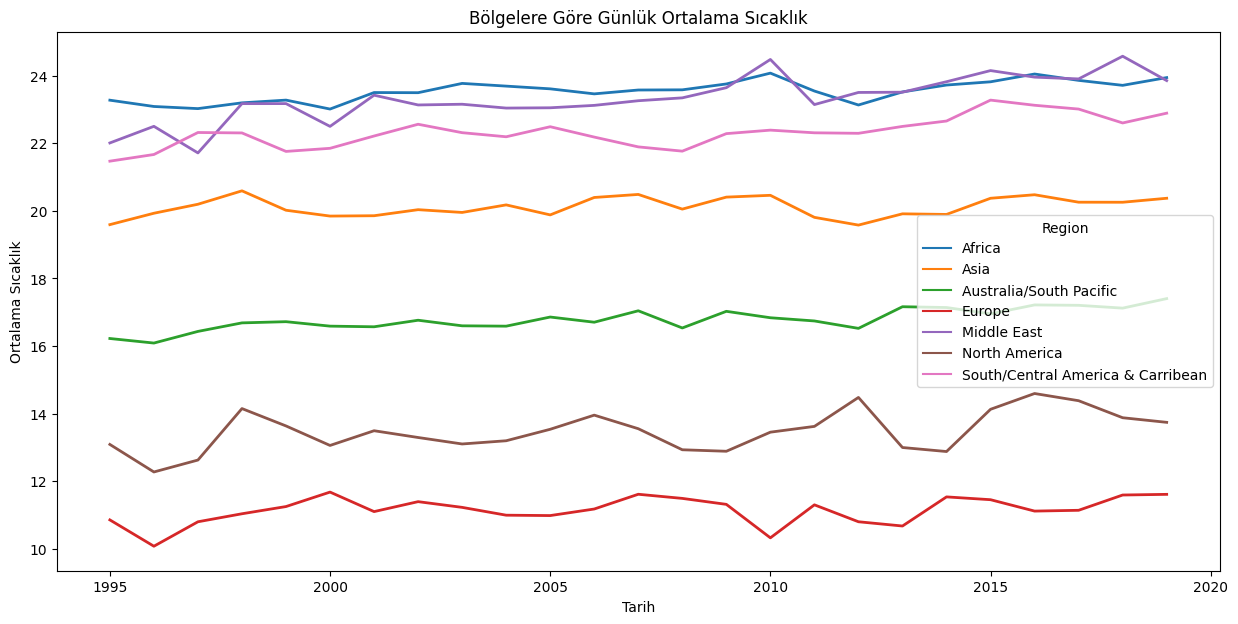

In [ ]:
region = df[['Region', 'Year', 'AvgTemperature']].groupby(['Region', 'Year']).mean()
plt.figure(figsize=(15,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Region', units = 'Region', markers = True, dashes = False, estimator = None, lw = 2, data = region)
plt.title("Bölgelere Göre Günlük Ortalama Sıcaklık")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık")
plt.show()

En sıcak ve soğuk değerlere bakma.

In [ ]:
df.sort_values(by = ['AvgTemperature'], ascending  = False).head(1)

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
1034962,Middle East,Kuwait,Not Specified,Kuwait,8,1,2012,43.333333,2012-08-01


In [ ]:
df.sort_values(by = ['AvgTemperature'], ascending  = False).tail(1)

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
1499140,North America,US,Alaska,Fairbanks,12,31,1999,-45.555556,1999-12-31


Şimdi bazı grafiklerle birkaç veri inceleyip verimiz düzgün mü anlayalım.

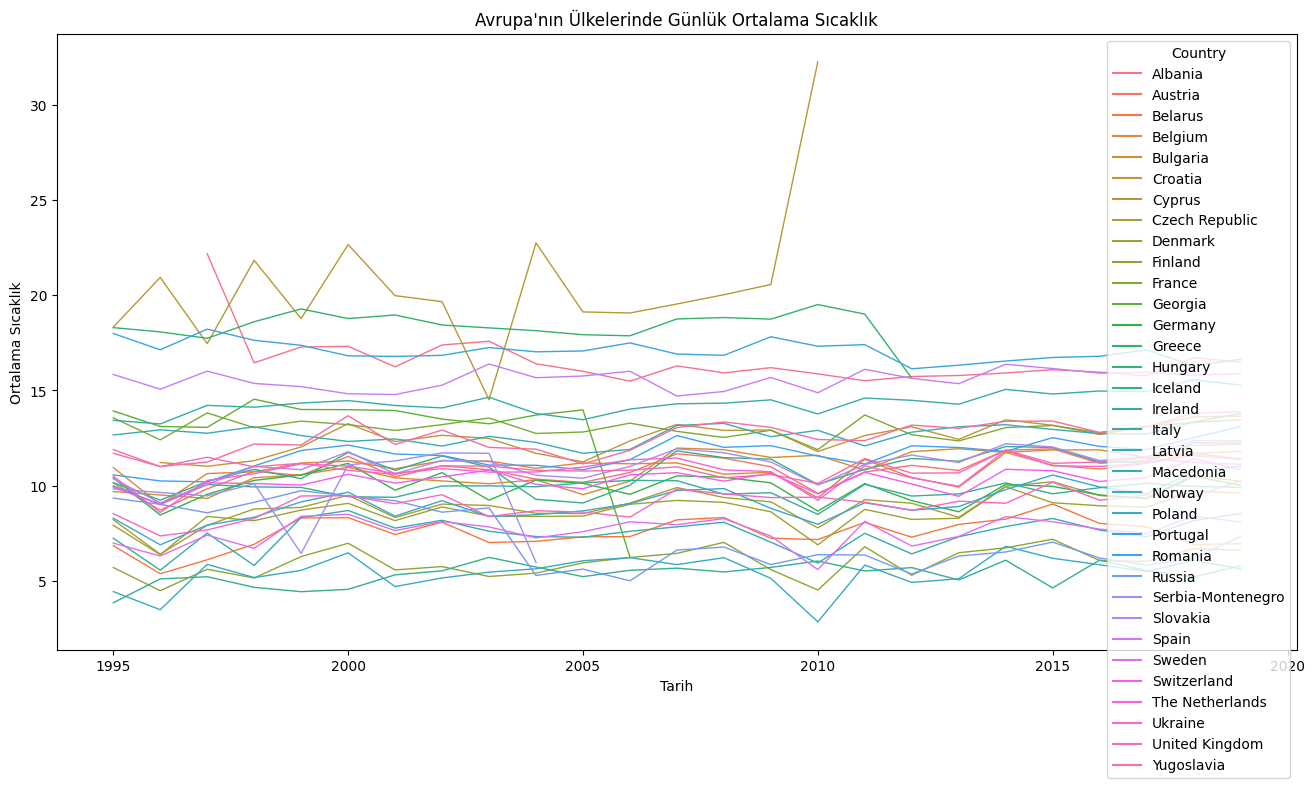

In [ ]:
country1=df[["Country","Region","Year","AvgTemperature"]]
country2=country1[(country1['Region'] == "Europe") ]
country=country2.drop("Region",axis=1).groupby(['Country', 'Year']).mean()
plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Country', units = 'Country', markers = True, dashes = False, estimator = None, lw = 1, data = country)
plt.title("Avrupa'nın Ülkelerinde Günlük Ortalama Sıcaklık")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık")
plt.show()

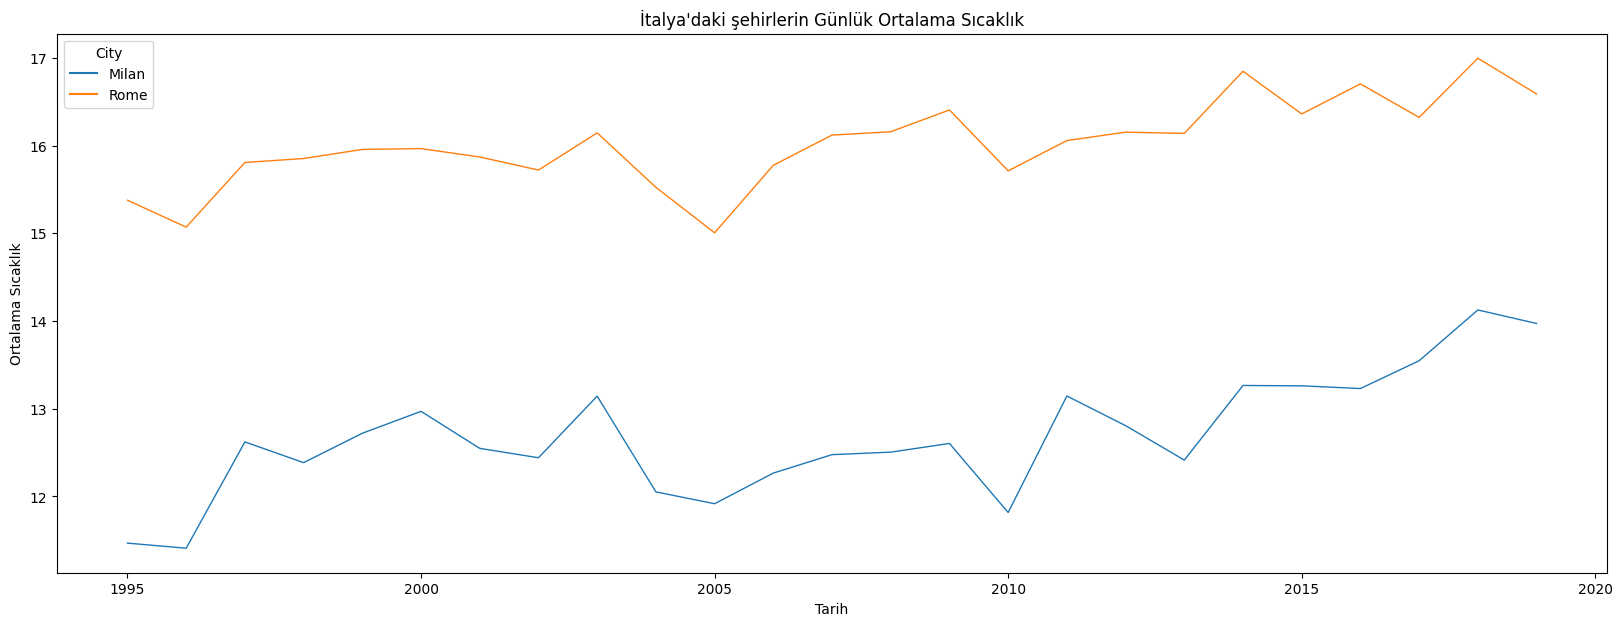

In [ ]:
city1=df[["Country","City","Year","AvgTemperature"]]
city2=city1[(city1['Country'] == "Italy") ]
city=city2.drop("Country",axis=1).groupby(['City', 'Year']).mean()
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'City', units = 'City', markers = True, dashes = False, estimator = None, lw = 1, data = city)
plt.title("İtalya'daki şehirlerin Günlük Ortalama Sıcaklık")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık")
plt.show()

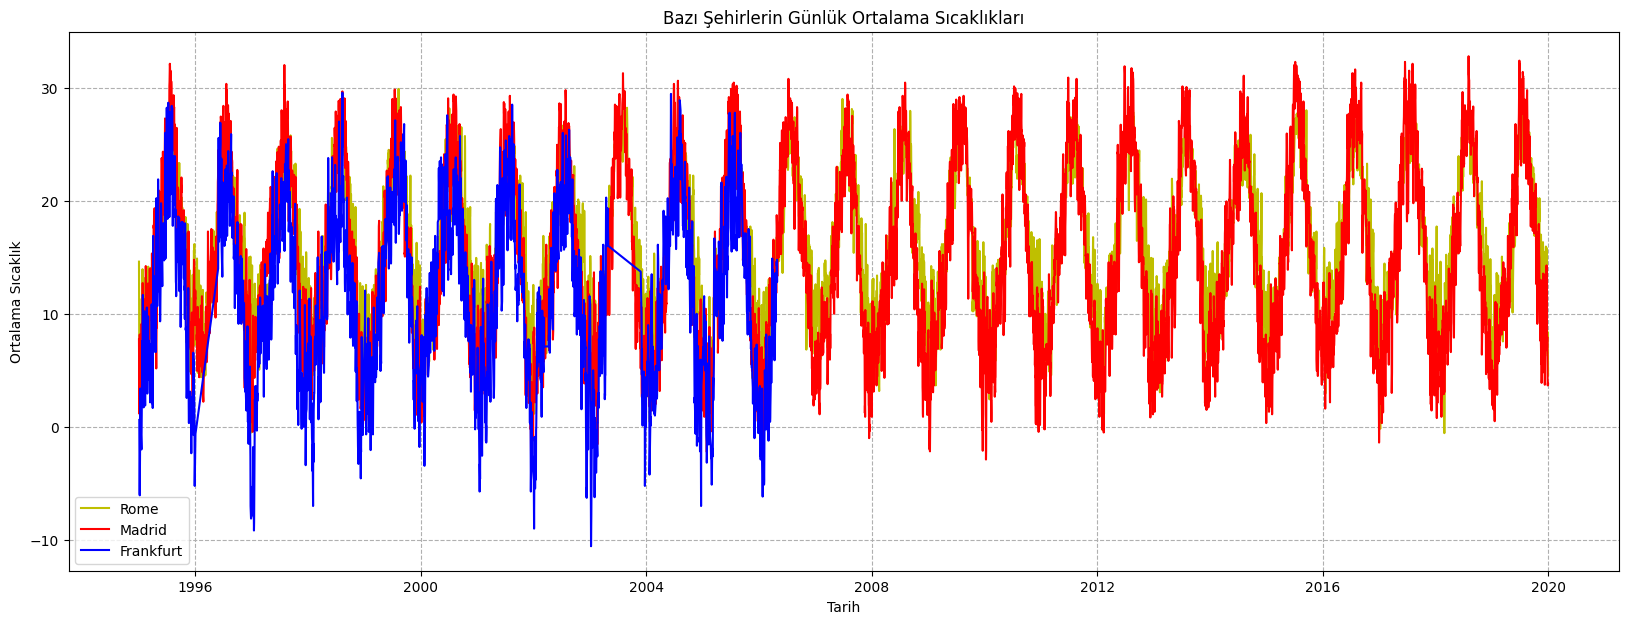

In [ ]:
plt.figure(figsize = (20,7))
plt.plot(df['Date'][(df['City'] =="Rome")], df['AvgTemperature'][(df['City'] =="Rome")], 'y' ,label = 'Rome')
plt.plot(df['Date'][(df['City'] =="Madrid")], df['AvgTemperature'][(df['City'] =="Madrid")], 'r' ,label = 'Madrid')
plt.plot(df['Date'][(df['City'] =="Frankfurt")], df['AvgTemperature'][(df['City'] =="Frankfurt")], 'b' ,label = 'Frankfurt')
plt.grid(linestyle = '--')
plt.legend(["Rome","Madrid","Frankfurt"])
plt.title("Bazı Şehirlerin Günlük Ortalama Sıcaklıkları")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Sıcaklık")
plt.show()

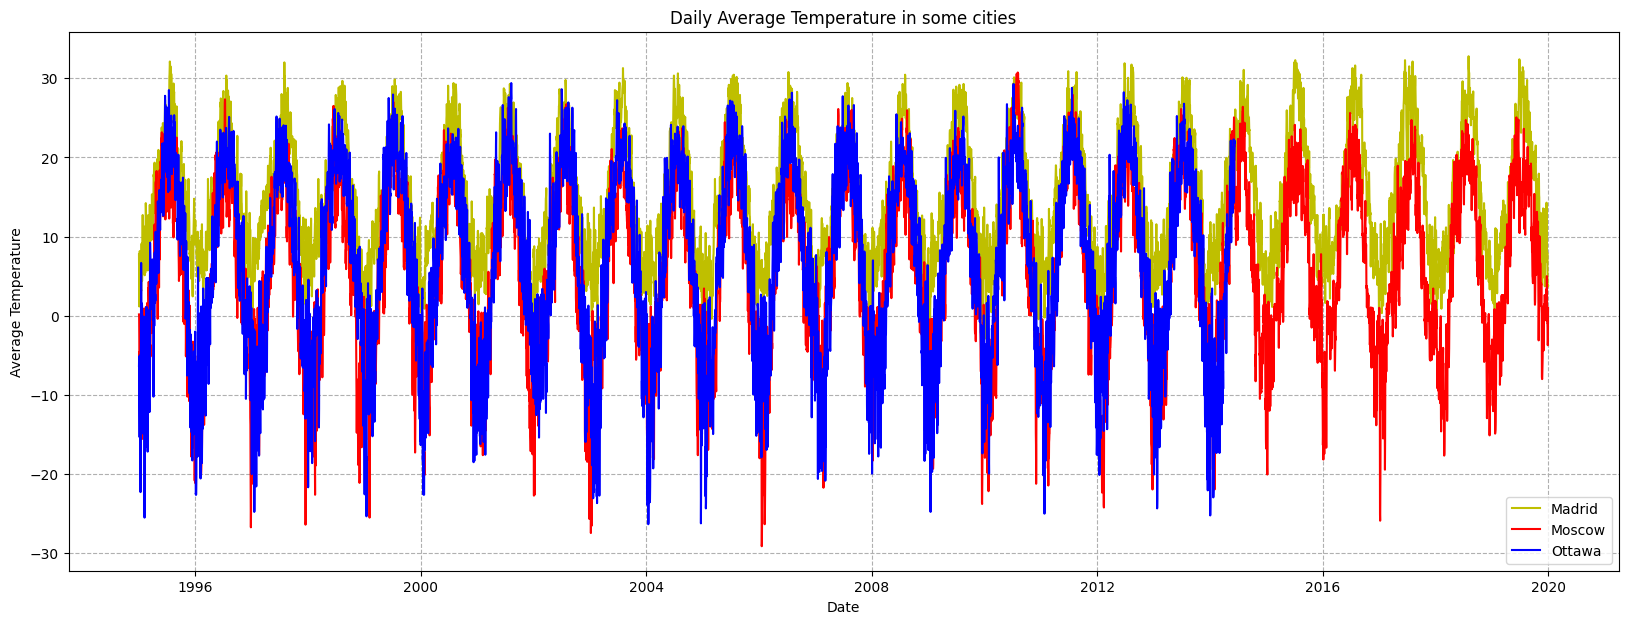

In [ ]:
#plotting by some cities
plt.figure(figsize = (20,7))
plt.plot(df['Date'][(df['City'] =="Madrid")], df['AvgTemperature'][(df['City'] =="Madrid")], 'y' ,label = 'Madrid')
plt.plot(df['Date'][(df['City'] =="Moscow")], df['AvgTemperature'][(df['City'] =="Moscow")], 'r' ,label = 'Moscow')
plt.plot(df['Date'][(df['City'] =="Ottawa")], df['AvgTemperature'][(df['City'] =="Ottawa")], 'b' ,label = 'Ottawa')
plt.grid(linestyle = '--')
plt.legend(["Madrid","Moscow","Ottawa"])
plt.title("Daily Average Temperature in some cities")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()


---

# **VERİ ÖN İŞLEME - (LABEL ENCODING / SPLITING TRAIN AND TEST SETS / SCALING)**

---





---


# Veriyi Train ve Test değişkenlerine Ayırma

### Etiket Kodlayıcıyı Kullanma (Sayısal olmayan Verileri sayısala dönüştürme)

Bunun için önce gerekli kütüphaneyi import etmemiz gerekmekte. Sonrasında label endcoding methoduyla nominal değerlerimizi sayısal bir değere dönüştürmek,bilgisayarın ve sonrasında uygulayacağımız modellerin anlayabileceği bir şekle getirmemizi sağlayacak

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
le=LabelEncoder()

In [ ]:
df["Region"]=le.fit_transform(df["Region"])
region = dict(zip(le.classes_, range(len(le.classes_))))
df["Country"]=le.fit_transform(df["Country"])
country = dict(zip(le.classes_, range(len(le.classes_))))
df["State"]=le.fit_transform(df["State"])
state = dict(zip(le.classes_, range(len(le.classes_))))
df["City"]=le.fit_transform(df["City"])
city = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
print(city)

{'Abidjan': 0, 'Abilene': 1, 'Abu Dhabi': 2, 'Addis Ababa': 3, 'Akron Canton': 4, 'Albany': 5, 'Albuquerque': 6, 'Algiers': 7, 'Allentown': 8, 'Almaty': 9, 'Amarillo': 10, 'Amman': 11, 'Amsterdam': 12, 'Anchorage': 13, 'Ankara': 14, 'Antananarivo': 15, 'Ashabad': 16, 'Asheville': 17, 'Athens': 18, 'Atlanta': 19, 'Atlantic City': 20, 'Auckland': 21, 'Austin': 22, 'Baltimore': 23, 'Bangkok': 24, 'Bangui': 25, 'Banjul': 26, 'Barcelona': 27, 'Baton Rouge': 28, 'Beijing': 29, 'Beirut': 30, 'Belfast': 31, 'Belgrade': 32, 'Belize City': 33, 'Bern': 34, 'Bilbao': 35, 'Billings': 36, 'Birmingham': 37, 'Bishkek': 38, 'Bismarck': 39, 'Bissau': 40, 'Bogota': 41, 'Boise': 42, 'Bombay (Mumbai)': 43, 'Bonn': 44, 'Bordeaux': 45, 'Boston': 46, 'Brasilia': 47, 'Bratislava': 48, 'Brazzaville': 49, 'Bridgeport': 50, 'Bridgetown': 51, 'Brisbane': 52, 'Brownsville': 53, 'Brussels': 54, 'Bucharest': 55, 'Budapest': 56, 'Buenos Aires': 57, 'Buffalo': 58, 'Bujumbura': 59, 'Burlington': 60, 'Cairo': 61, 'Calcut

In [ ]:
df.shape
#output  (2767895, 9)
2767895*0.90

2491105.5

In [ ]:
df=df.sort_values(by="Date")

In [ ]:
split=2491106
train=df[:split]
test=df[split:]

In [ ]:
test.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
2760430,5,114,45,310,12,31,2019,4.333333,2019-12-31
2309958,5,114,33,250,12,31,2019,2.555556,2019-12-31
831413,3,64,36,275,12,31,2019,-0.833333,2019-12-31
293857,1,20,36,269,12,31,2019,2.944444,2019-12-31
1979886,5,114,18,219,12,31,2019,5.055556,2019-12-31


In [ ]:

#80% train and 20% test
x_train=train.drop(["AvgTemperature","Date"],axis=1).to_numpy()
y_train=train["AvgTemperature"].to_numpy()
x_test=test.drop(["AvgTemperature","Date"],axis=1).to_numpy()
y_test=test["AvgTemperature"].to_numpy()



Şimdilik 8'e 2 oranında train ve test verilerimizi ayırdık. Modelimizin performans değerlerine göre bunu değiştirebiliriz.

Onun dışında standart scaler uygulanan ve uygulanmayan şekilde farklı türde değişkenlerimiz var bunları karşılaştıracağız bazı metricler kullanarak.

In [ ]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,0,1,36,7,1,1,1995,17.888889,1995-01-01
2069204,5,114,23,123,1,1,1995,-0.500000,1995-01-01
2059939,5,114,23,113,1,1,1995,-0.388889,1995-01-01
2050674,5,114,23,96,1,1,1995,1.166667,1995-01-01
2041409,5,114,22,46,1,1,1995,3.611111,1995-01-01


Şuan gördüğümüz gibi değerlerimizi sayısal bir hale getirmiş bulunmaktayız.

# Standart Scaler Methodu ile Veriyi Ölçekleme
Standard Scaler, veriyi ölçeklemek için kullanılan bir yöntemdir ve özellikle bazı makine öğrenmesi modellerinde verinin uygun ölçekte olması model performansını ciddi şekilde etkiler. Standard Scaler, veriyi ölçeklerken her özelliği (sütunu) standart bir normal dağılıma dönüştürür. Yani her sütunun ortalaması 0 ve standart sapması 1 olacak şekilde ölçeklenir

Bir model üzerinde bu farkı deneyip gözlemleyebiliriz. Hadi mesela Treebased regression modeli üstünde test yapalım farkı görelim.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Test verisiyle tahmin yapma
y_pred = model.predict(x_test)

# Performans metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Ölçeklenmemiş Veri -  Mean Squared Error: {rmse}")
print(f"Ölçeklenmemiş Veri - Mean Squared Error: {mse}")
print(f"Ölçeklenmemiş Veri - R^2 Score: {r2}")

Ölçeklenmemiş Veri -  Mean Squared Error: 5.104921861007103
Ölçeklenmemiş Veri - Mean Squared Error: 26.06022720698822
Ölçeklenmemiş Veri - R^2 Score: 0.7630879920179341


Standart scaler kullanılmayan verilerdeki MSE ve R2 skorlarımız bu şekilde.

---



Ekstra bilgilendirme bu elde ettiğimiz skorlarla alakalı.
R² (R-Squared) Skoru:
*  R² = 1: Model mükemmel bir tahmin yapmıştır, tüm varyansı açıklamıştır.
*  R² = 0: Model, hiçbir şey açıklayamamıştır. Yani, ortalama değeri tahmin etmek kadar kötü çalışmaktadır.
* R² < 0: Model, rastgele tahminlerden daha kötü performans göstermektedir.

> R²: Modelin ne kadar iyi olduğunu gösterir, 1'e ne kadar yakınsa o kadar iyidir.

Mean Squared Error (MSE):
* MSE'nin değeri ne kadar küçükse, modelin tahminleri o kadar doğru olur.
* Birim kare cinsinden olduğu için, tahminlerdeki hataları büyütebilir.
* Yüksek bir MSE değeri, modelin tahminlerinin kötü olduğu anlamına gelir.
>MSE: Hata miktarını ölçer, düşük olmalıdır.




>  Root Mean Squared Error (RMSE), tahmin edilen değerler ile gerçek değerler arasındaki hataların karelerinin ortalamasının kareköküdür. MSE'nin karekökü alınarak elde edilir, bu sayede hata birimleri, modelin tahmin ettiği hedef değişkenle aynı birimlerde olur.
---

In [ ]:
from sklearn.preprocessing import StandardScaler
model = DecisionTreeRegressor()
scaler = StandardScaler()

# Eğitim ve test verilerini ölçeklendirin
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Performans metriklerini hesaplama
model.fit(x_train_scaled, y_train)

# Ölçeklenmiş veri ile tahmin yapma
y_pred_scaled = model.predict(x_test_scaled)

# Performans metriklerini hesaplama
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"Ölçeklenmemiş Veri -  Mean Squared Error: {rmse_scaled}")
print(f"Ölçeklenmemiş Veri - Mean Squared Error: {mse_scaled}")
print(f"Ölçeklenmemiş Veri - R^2 Score: {r2_scaled}")

Ölçeklenmemiş Veri -  Mean Squared Error: 5.1047865458006365
Ölçeklenmemiş Veri - Mean Squared Error: 26.058845678187193
Ölçeklenmemiş Veri - R^2 Score: 0.7631005514158141


Scale edilince modelin nasıl iyileştiği göze çarpıyor.

# Hangi Modellerin en iyi olduğunun test edilmesi

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

In [ ]:
regressors = {
              "Linear Regression": LinearRegression(),
              "Ridge Regression": Ridge(),
              "Lasso Regression": Lasso(),
              "Elastic Net Regression": ElasticNet(),
              "Bayesian Regression": BayesianRidge(),
              "Decision Tree Regression": DecisionTreeRegressor(),
              "KNN Regression": KNeighborsRegressor(),
              "XGBRegressor": XGBRegressor(),
              }

In [ ]:
for name, regressor in regressors.items():

    model.fit(x_train, y_train)

    # test setleri üzerinde tahminler yaptır
    y_test_p = model.predict(x_test)

    # test setleri için R-kare puanlarını hesaplar
    # r kare asağıda daha detaylı anlatılmıştır
    test_r2 = r2_score(y_test, y_test_p)

    print(f"Model: {name.upper()}")
    print(f"Test R-Squared Score: {test_r2:.5f}\n")

    print(name.upper())
    scores = cross_validate(model, x_train, y_train,
                            scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                            cv = 5, return_train_score = False)  # burada return_train_score False olarak ayarlanıyor
                                                                  # böylece eğitim seti üzerindeki skorlar dönmeyecek ve bu skorlar çıktıda görünmeyecektir.
    scores = pd.DataFrame(scores, index = range(1,6))

    print(scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format))

    print("\n############################################################################\n")

Model: LINEAR REGRESSION
Test R-Squared Score: 0.76309

LINEAR REGRESSION
test_r2                                                 0.76389
test_neg_mean_absolute_error                            3.71246
test_neg_mean_squared_error                            26.59621
test_neg_mean_absolute_percentage_error    18644276986473.80078
dtype: object

############################################################################

Model: RIDGE REGRESSION
Test R-Squared Score: 0.76309

RIDGE REGRESSION
test_r2                                                 0.76389
test_neg_mean_absolute_error                            3.71246
test_neg_mean_squared_error                            26.59616
test_neg_mean_absolute_percentage_error    18644276986473.80078
dtype: object

############################################################################

Model: LASSO REGRESSION
Test R-Squared Score: 0.76309

LASSO REGRESSION
test_r2                                                 0.76389
test_neg_mean_absolu

(XGBREGRESSOR,KNN REGRESSION ve DECISION TREE REGRESSION) Bu son 3 modellimiz bu veri seti için diğerlerine göre daha iyi sonuç gösteriyor

Şimdi scale edilmiş verilerimizle sonuçlara tekrardan bakacağız ve iyileştirme olup olmadığına bakacağız.

## Scaled edilmiş verilerle ve başarılı olan modellerle sonuçları yeniden gözlemleme

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate
import pandas as pd

# Kullanılacak modeller
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGB Regressor": XGBRegressor()
}

# Her bir model için döngü
for name, model in models.items():
    # Modeli eğitim verisi ile fit et
    model.fit(x_train_scaled, y_train)

    # Test setleri üzerinde tahminler yap
    y_test_pred = model.predict(x_test_scaled)

    # Test R-kare puanlarını hesapla
    test_r2 = r2_score(y_test, y_test_pred)

    # Cross-validation skorlarını hesapla
    scores = cross_validate(model, x_train_scaled, y_train,
                            scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                            cv=5, return_train_score=False)

    scores_df = pd.DataFrame(scores, index=range(1, 6))

    # Sonuçları yazdır
    print(f"Model: {name.upper()}")
    print(f"Test R-Squared Score: {test_r2:.5f}")
    print("Cross-Validation Scores:")
    print(scores_df.iloc[:, 2:].mean().abs().apply("{:.5f}".format))
    print("\n############################################################################\n")

Model: DECISION TREE REGRESSOR
Test R-Squared Score: 0.76310
Cross-Validation Scores:
test_r2                                                 0.76389
test_neg_mean_absolute_error                            3.71236
test_neg_mean_squared_error                            26.59528
test_neg_mean_absolute_percentage_error    18644276986473.80078
dtype: object

############################################################################

Model: KNN REGRESSOR
Test R-Squared Score: 0.77306
Cross-Validation Scores:
test_r2                                                 0.76938
test_neg_mean_absolute_error                            3.73049
test_neg_mean_squared_error                            25.97354
test_neg_mean_absolute_percentage_error    17515241064407.89453
dtype: object

############################################################################

Model: XGB REGRESSOR
Test R-Squared Score: 0.85962
Cross-Validation Scores:
test_r2                                                 0.86236


Çıkan sonuçlara bakarak DECISION TREE REGRESSOR modelimizin daha iyi olabilme ihtimalini değerlendirerek Grid SearchCv methodu ile en uygun neighbors değişkeninin ne olduğunu test edicem

# Hiperparametre Optimizasyonu

# GridSearchCV ile birlikte en uygun parametreleri bulma

## Decision Tree modeli Hiper optimizisyon

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeRegressor()
param_grid_dt = {
    'max_depth': [30,40],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                              scoring='r2', cv=3, n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train_scaled, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Decision Tree En İyi Parametreler: {best_params_dt}")
print(f"Decision Tree En İyi Cross-Validation R2 Skoru: {best_score_dt:.5f}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits

Decision Tree En İyi Parametreler: {'max_depth': 30, 'min_samples_split': 10}

Decision Tree En İyi Cross-Validation R2 Skoru: 0.79479


R2 skoru depth değeri arttıkça artıyor gibi görünüyor.
Şimdi tekrar birkaç parametre değişikliği ile tekrardan deneyelim default ayarlardan daha iyi bir skor almaya çalışıyoruz.

In [ ]:
dt = DecisionTreeRegressor()
param_grid_dt = {
    'max_depth': [40,60],
    'min_samples_split': [10],
    'min_samples_leaf': [2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                              scoring='r2', cv=3, n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train_scaled, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Decision Tree En İyi Parametreler: {best_params_dt}")
print(f"Decision Tree En İyi Cross-Validation R2 Skoru: {best_score_dt:.5f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Decision Tree En İyi Parametreler: {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10}

Decision Tree En İyi Cross-Validation R2 Skoru: 0.79495


Az da olsa modelimizin R2 oranını yükseltmeyi başardık.Şimdi bu parametreleri kullanarak modelimizi son kez test edelim. Grafiklerle de gözlemleyelim sonucumuzu.

Burada görüyoruzki hiper parametre optimizasyonu ile sonucumuz önceki haline göre bir iyileşme göstermiş R2 skoru açısından.

## Decision Tree modelinin Grafiği

In [ ]:
dt_best = DecisionTreeRegressor(
    max_depth=best_params_dt['max_depth'],
    min_samples_split=best_params_dt['min_samples_split'],
    min_samples_leaf=best_params_dt['min_samples_leaf']
)

# Modeli yeniden eğitin
dt_best.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=40, min_samples_leaf=4, min_samples_split=10)

In [ ]:
y_pred_dt = dt_best.predict(x_test_scaled)

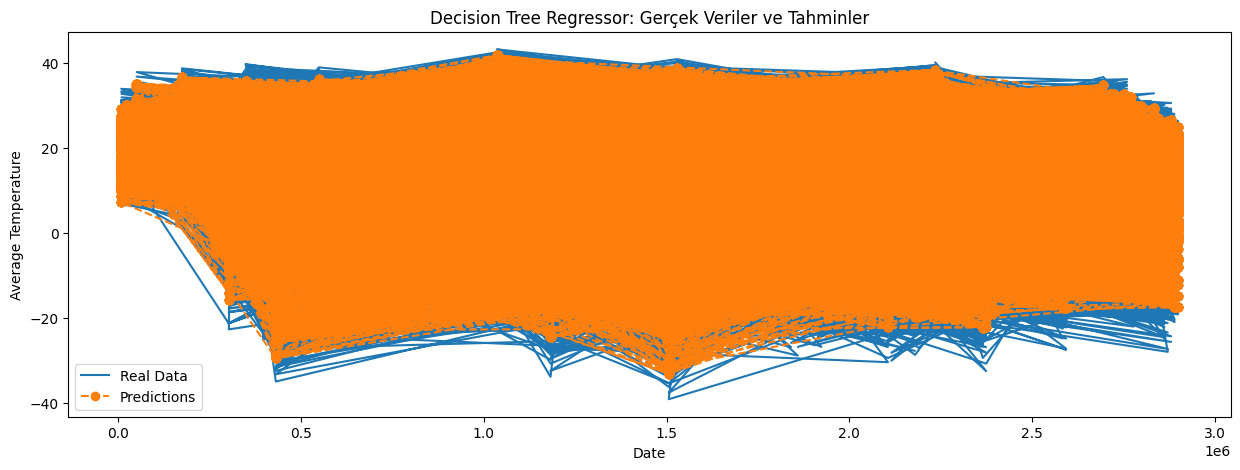

In [ ]:
test['predictionDT'] = y_pred_dt

# Grafik oluşturma
plt.figure(figsize=(15, 5))

# Gerçek verileri çiz
plt.plot(df.loc[test.index, 'AvgTemperature'], label='Real Data')

# Tahminleri çiz
plt.plot(test.index, test['predictionDT'], label='Predictions', linestyle='--', marker='o')

plt.legend()
plt.title('Decision Tree Regressor: Gerçek Veriler ve Tahminler')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

DEcision Tree yerin XGB Regresson daha iyi olucak gibi gözüküyor.

# Xgbr modeli overfit yapmadan çalışabilir

In [ ]:
import xgboost as xgb
xgbr=xgb.XGBRegressor()

In [ ]:
xgbr.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgbrPredic=xgbr.predict(x_test)

In [ ]:
df=df.sort_values(by="Date")

In [ ]:
test.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
2197813,5,114,28,168,5,10,2017,17.166667,2017-05-10
711320,3,33,36,139,5,10,2017,1.055556,2017-05-10
403015,1,60,36,38,5,10,2017,22.666667,2017-05-10
1941861,5,114,17,294,5,10,2017,23.444444,2017-05-10
2676080,5,114,45,85,5,10,2017,25.777778,2017-05-10


In [ ]:
test.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
2197813,5,114,28,168,5,10,2017,17.166667,2017-05-10
711320,3,33,36,139,5,10,2017,1.055556,2017-05-10
403015,1,60,36,38,5,10,2017,22.666667,2017-05-10
1941861,5,114,17,294,5,10,2017,23.444444,2017-05-10
2676080,5,114,45,85,5,10,2017,25.777778,2017-05-10


In [ ]:
print(f"Test set size: {test.shape}")
print(f"Predictions size: {len(xgbrPredic)}")

Test set size: (276789, 9)

Predictions size: 276789


In [ ]:
print("Root Mean Squared Error (RMSE) score XGBoost:"+str(np.sqrt(mean_squared_error(y_test,xgbrPredic))))

Root Mean Squared Error (RMSE) score XGBoost:3.929595151727752



---
# Xgbr Modelinin Tahmin Doğruluğunun Ayrıntılı Değerlendirmesi



In [ ]:
xgbrPredic=xgbr.predict(x_test)

In [ ]:
print("Root Mean Squared Error (RMSE) score XGBoost:"+str(np.sqrt(mean_squared_error(y_test,xgbrPredic))))

Root Mean Squared Error (RMSE) score XGBoost:3.929595151727752


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_best = DecisionTreeRegressor()

# Modeli yeniden eğit
dt_best.fit(x_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_dt = dt_best.predict(x_test)


In [ ]:
print(f"Test set boyutu: {x_test.shape}")
print(f"Tahmin edilen değerlerin boyutu: {y_pred_dt.shape}")

Test set boyutu: (276789, 7)

Tahmin edilen değerlerin boyutu: (276789,)


In [ ]:
from xgboost import XGBRegressor

In [ ]:
dt_best = XGBRegressor()

# Modeli yeniden eğit
dt_best.fit(x_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_xgb = dt_best.predict(x_test)

In [ ]:
print(f"Test set boyutu: {x_test.shape}")
print(f"Tahmin edilen değerlerin boyutu: {y_pred_xgb.shape}")

Test set boyutu: (276789, 7)

Tahmin edilen değerlerin boyutu: (276789,)


In [ ]:
test["predictionDT"] = y_pred_dt

In [ ]:
test["predictionXgb"] = y_pred_xgb

In [ ]:
test.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date,predictionDT,predictionXgb
2197813,5,114,28,168,5,10,2017,17.166667,2017-05-10,16.333333,15.228075
711320,3,33,36,139,5,10,2017,1.055556,2017-05-10,1.055556,9.151290
403015,1,60,36,38,5,10,2017,22.666667,2017-05-10,12.777778,19.324991
1941861,5,114,17,294,5,10,2017,23.444444,2017-05-10,23.111111,17.592863
2676080,5,114,45,85,5,10,2017,25.777778,2017-05-10,28.000000,24.919992


In [ ]:
df=df.merge(test[["predictionXgb"]],how="left",left_index=True,right_index=True)

In [ ]:
test.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date,predictionDT,predictionXgb
2197813,5,114,28,168,5,10,2017,17.166667,2017-05-10,16.333333,15.228075
711320,3,33,36,139,5,10,2017,1.055556,2017-05-10,1.055556,9.151290
403015,1,60,36,38,5,10,2017,22.666667,2017-05-10,12.777778,19.324991
1941861,5,114,17,294,5,10,2017,23.444444,2017-05-10,23.111111,17.592863
2676080,5,114,45,85,5,10,2017,25.777778,2017-05-10,28.000000,24.919992


In [ ]:
print(city)

{'Abidjan': 0, 'Abilene': 1, 'Abu Dhabi': 2, 'Addis Ababa': 3, 'Akron Canton': 4, 'Albany': 5, 'Albuquerque': 6, 'Algiers': 7, 'Allentown': 8, 'Almaty': 9, 'Amarillo': 10, 'Amman': 11, 'Amsterdam': 12, 'Anchorage': 13, 'Ankara': 14, 'Antananarivo': 15, 'Ashabad': 16, 'Asheville': 17, 'Athens': 18, 'Atlanta': 19, 'Atlantic City': 20, 'Auckland': 21, 'Austin': 22, 'Baltimore': 23, 'Bangkok': 24, 'Bangui': 25, 'Banjul': 26, 'Barcelona': 27, 'Baton Rouge': 28, 'Beijing': 29, 'Beirut': 30, 'Belfast': 31, 'Belgrade': 32, 'Belize City': 33, 'Bern': 34, 'Bilbao': 35, 'Billings': 36, 'Birmingham': 37, 'Bishkek': 38, 'Bismarck': 39, 'Bissau': 40, 'Bogota': 41, 'Boise': 42, 'Bombay (Mumbai)': 43, 'Bonn': 44, 'Bordeaux': 45, 'Boston': 46, 'Brasilia': 47, 'Bratislava': 48, 'Brazzaville': 49, 'Bridgeport': 50, 'Bridgetown': 51, 'Brisbane': 52, 'Brownsville': 53, 'Brussels': 54, 'Bucharest': 55, 'Budapest': 56, 'Buenos Aires': 57, 'Buffalo': 58, 'Bujumbura': 59, 'Burlington': 60, 'Cairo': 61, 'Calcut

In [ ]:
df=df.set_index("Date")

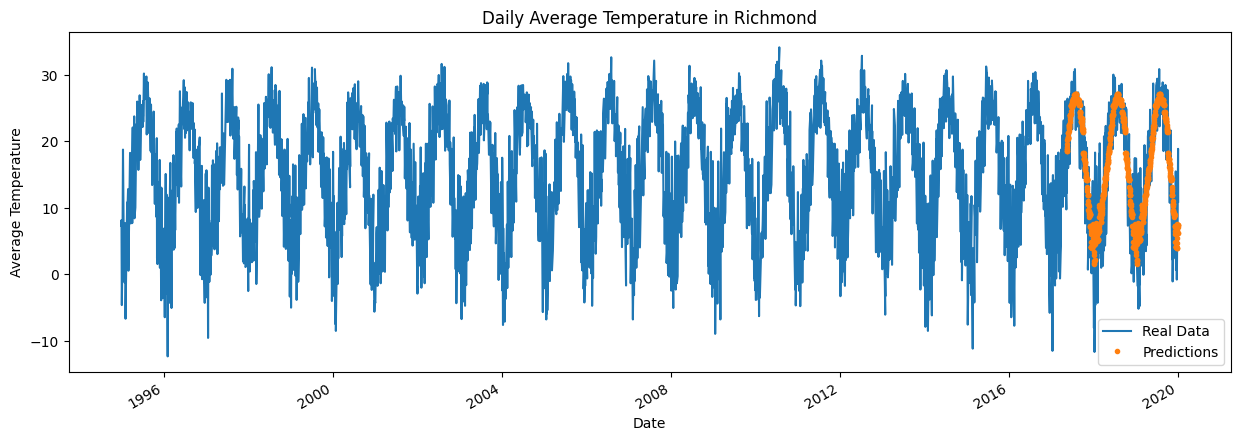

In [ ]:
ax=df['AvgTemperature'][(df['City']==city["Richmond"])].plot(figsize=(15,5))
df["predictionXgb"][(df['City'] ==city["Richmond"])].plot(ax=ax,style=".")
plt.legend(["Real Data","Predictions"])
ax.set_title("Daily Average Temperature in Richmond")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

Burada görüyoruzki modelimiz güzel bir şekilde tahminleme yapabiliyor şimdi başka bir yöntemle gözetimsiz öğrenme modeliyle kodu deneyelim.

### Xgb scale verisiyle

In [ ]:
xgb_best = XGBRegressor()

xgb_best.fit(x_train_scaled, y_train)

# Test seti üzerinde tahmin yap
y_pred_xgb = xgb_best.predict(x_test_scaled)

In [ ]:
print(f"Test set boyutu: {x_test_scaled.shape}")
print(f"Tahmin edilen değerlerin boyutu: {y_pred_xgb.shape}")

Test set boyutu: (276789, 7)

Tahmin edilen değerlerin boyutu: (276789,)


# Şimdi Gözetimsiz öğrenme Modelimizi Deneme

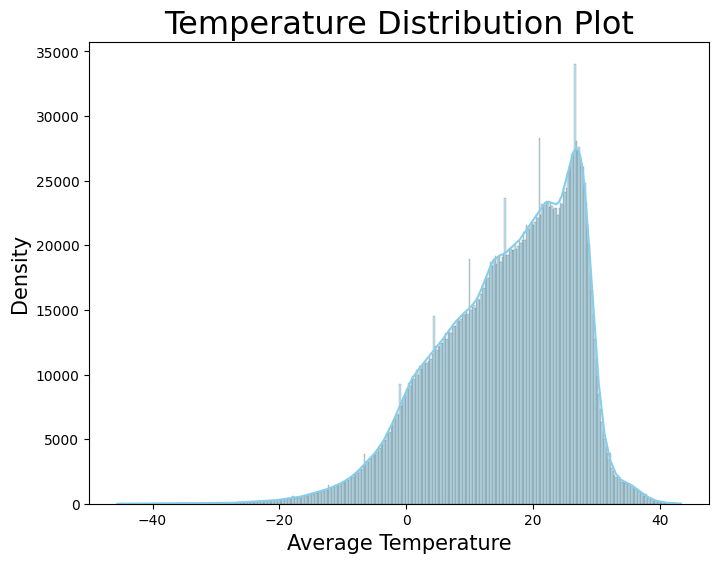

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Temperature Distribution Plot', fontsize=23)

# Sıcaklık verisi için dağılım grafiği
sns.histplot(df['AvgTemperature'], color='skyblue', kde=True)

# Grafiği göster
plt.xlabel("Average Temperature", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

Sıcaklık Yoğunluğumuzun büyük kısmı 20 ile 40 arasında gözüküyor.

# **Korelasyon matrixi**

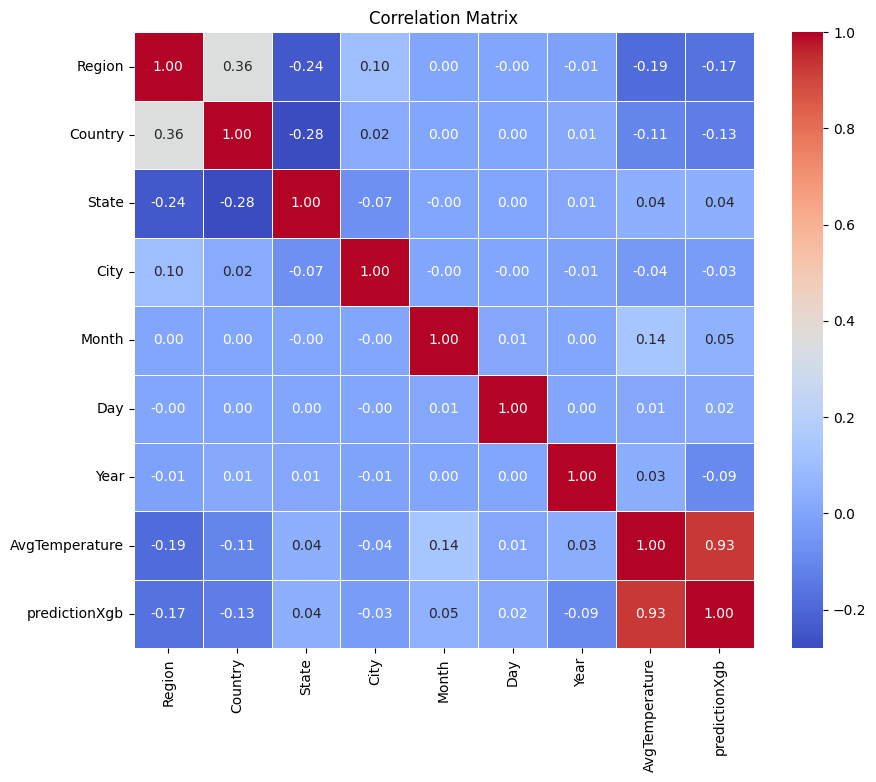

Region           -0.186641

Country          -0.109294

State             0.037573

City             -0.043865

Month             0.135789

Day               0.006870

Year              0.030657

AvgTemperature    1.000000

predictionXgb     0.928370

Name: AvgTemperature, dtype: float64


In [ ]:
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
temperature_correlation = correlation_matrix['AvgTemperature']
print(temperature_correlation)

Burdan anlaşılan Day parametresi benim verimle en az korelasyona sahip.

K-Means kümeleme algoritmasının temel amacı, verileri k adet kümeye ayırarak, her bir küme için bir ağırlık merkezi (centroid) belirlemektir. Bu merkezler, verilerin dağılımını en iyi şekilde temsil edecek şekilde seçilir. Algoritmanın optimizasyon amacı, kümeler içindeki noktalar ile kendi ağırlık merkezleri arasındaki uzaklıkların toplamını (kayıp fonksiyonu veya inertia değeri) minimize etmektir.

Ancak, yalnızca inertia değerini en aza indirmek, kümeleme problemini ideal şekilde çözmek anlamına gelmez. Örneğin, küme sayısını veri setindeki eleman sayısına eşitlersek, her bir veri noktası kendi kümesi olur ve inertia sıfır olur. Bu durumda, veri kümelenmiş olmaz.

İdeal küme sayısını belirlemek için sıkça kullanılan yöntemlerden biri dirsek metodudur. Bu yöntem, inertia değerinin belirli bir noktadan sonra hızla azalmadığı, "dirsek" şeklinde bir eğri oluşturduğu noktayı bularak uygun küme sayısını belirlemeye çalışır.








# K-means modeli ile Gözetimsiz öğrenme

Şimdi scaled edilmiş bir şekilde sıcaklık değerimizi kullanarak dirsek methodunu uygulayacağız

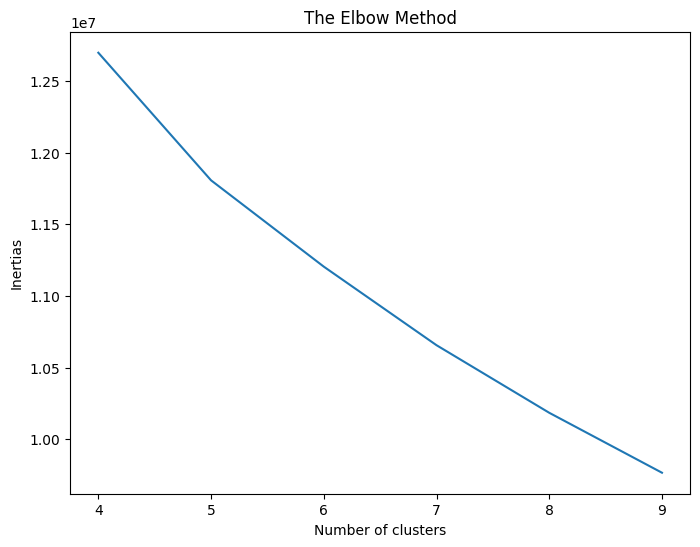

In [ ]:
df_dropped = df.drop(['AvgTemperature', 'Date','predictionXgb'], axis=1)

# Geri kalan sayısal verileri alalım
X = df_dropped.values

# Standartlaştırma işlemi
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

# Elbow Method uygulaması
inertias = []
for i in range(4, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(scaled_x)
    inertias.append(kmeans.inertia_)

# Grafiği çizdirme
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(4, 10), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

Verimiz büyğk olduğundan cluster sayımızı 10 veya 11 vermemiz daha iyi olur.

In [ ]:
model = KMeans(n_clusters=10)
training_points = scaled_x[:1000]
test_points = scaled_x[1000:]
model.fit(training_points)
labels = model.predict(test_points)

### Grafik küme dağılımı

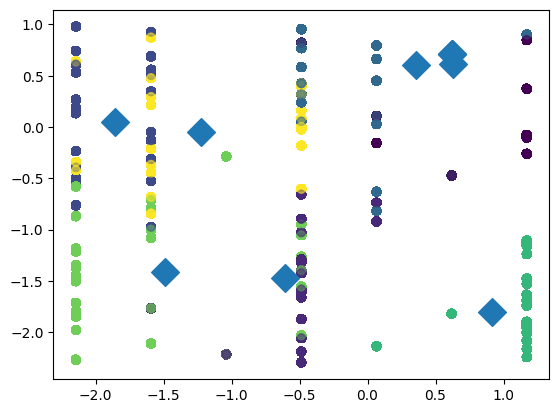

In [ ]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

PCA uygulayıp yeniden bakalım tabloda daha netleşme olucak mı diye.

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

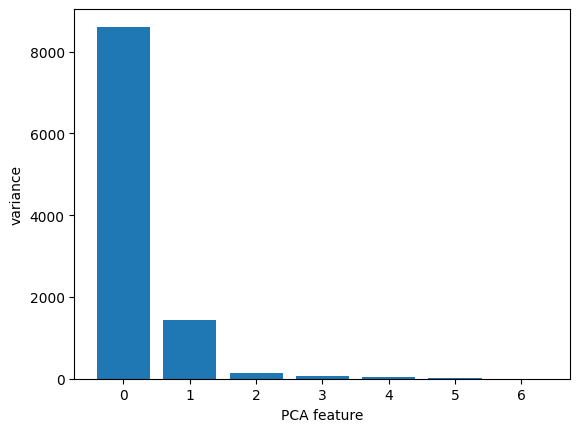

In [ ]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Burdaki tabloya göre sadece 2 özellik ile devam edersek çok fazla bir anlamlı veri kaçırmayız. Buna içsel boyut da deniyor

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.8337513  0.13983729]

0.9735885838892179


Buradaki açıklamaya göre kalan verileri kullanmasak bile verimizin %97den fazla bir kısmını silmemiş olucaz. Bu sebepten ötürü components kısmını 2 seçebiliriz.

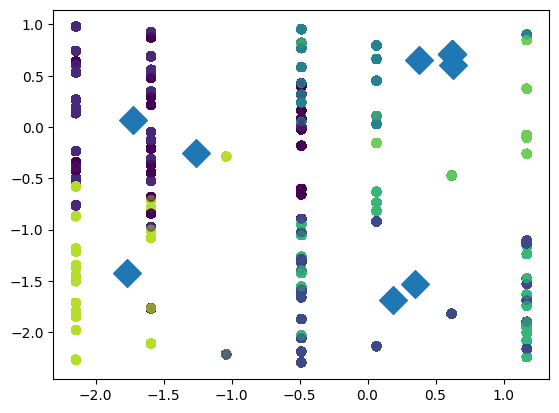

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
model = KMeans(n_clusters=10)
training_points = scaled_x[:1000]
test_points = scaled_x[1000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

Verimiz öncekine göre daha net kümelendi